In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [49]:
data = pd.read_csv("avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [50]:
# regions
data['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [51]:
data['region'].value_counts()

BuffaloRochester       338
HartfordSpringfield    338
MiamiFtLauderdale      338
Albany                 338
Detroit                338
SanFrancisco           338
Midsouth               338
LasVegas               338
Spokane                338
Pittsburgh             338
Seattle                338
Indianapolis           338
GrandRapids            338
SanDiego               338
Sacramento             338
PhoenixTucson          338
Denver                 338
Roanoke                338
GreatLakes             338
Portland               338
LosAngeles             338
Syracuse               338
TotalUS                338
StLouis                338
Southeast              338
Orlando                338
Louisville             338
Philadelphia           338
CincinnatiDayton       338
California             338
NewOrleansMobile       338
Atlanta                338
Boston                 338
Northeast              338
BaltimoreWashington    338
Plains                 338
Boise                  338
N

In [52]:
data.shape

(18249, 14)

In [53]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [54]:
data.apply(lambda x: sum(x.isnull()))

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

no missing values present in the dataset

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [56]:
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [57]:
categorical = data.select_dtypes(include =[np.object])
print("Categorical Features in Avocdo data Set:",categorical.shape[1])

numerical= data.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Avocado data Set:",numerical.shape[1])

Categorical Features in Avocdo data Set: 3
Numerical Features in Avocado data Set: 11


In [58]:
data['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

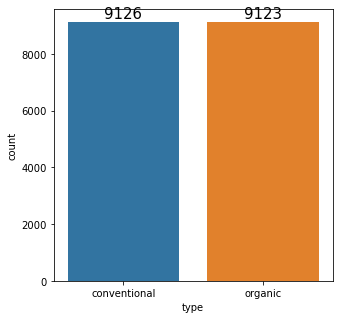

In [59]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data['type'])
for p in ax.patches:
             ax.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 8),
                 textcoords='offset points')

Equally distributed both conventional and organic Avocado

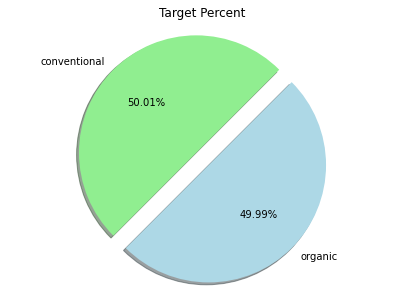

In [60]:

plt.figure(figsize=(7, 5))
target_count = [len(data[data['type'] == 'conventional']),len(data[data['type'] == 'organic'])]
labels = ['conventional', 'organic']
colors = ['lightgreen', 'lightblue']
explode = (0.05, 0.1)
plt.pie(target_count, explode=explode, labels=labels, 
colors=colors,autopct='%4.2f%%',shadow=True, startangle=45)
plt.title('Target Percent')
plt.axis('equal')
plt.show()  


Equally distributed the both conventional and organic

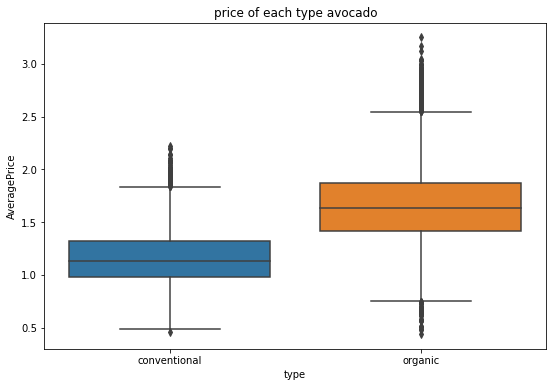

In [61]:
plt.figure(figsize = (9,6))
plt.title('price of each type avocado')
sns.boxplot(x= 'type', y = 'AveragePrice', data = data)

It looks like the organic price is more than the conventional price

Equally distributed the 2 types of Avocado

Text(56.625, 0.5, 'Average Price')

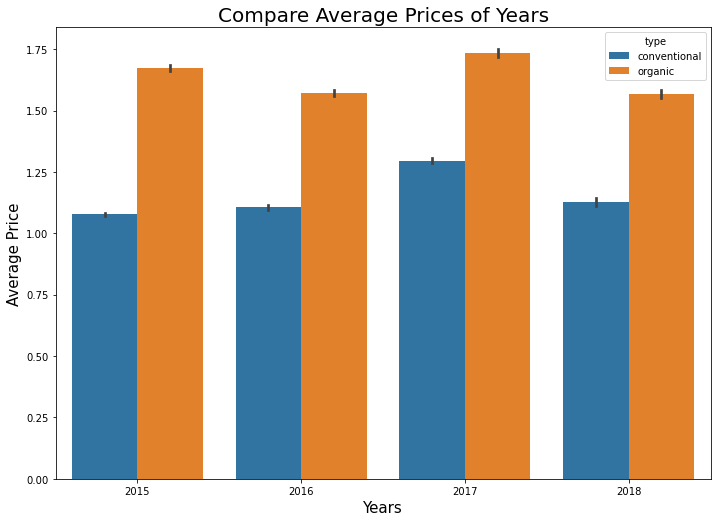

In [62]:
f,ax = plt.subplots(figsize = (10,7))
sns.barplot(x="year", y="AveragePrice",hue="type",data=data)
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.title("Compare Average Prices of Years",fontsize = 20)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Average Price',fontsize = 15)


We clearly see that the Organic avocados are more expensive and 
2017 the price of avocado is more than other years and in 2018 the price is less than compare with ohter years

In [63]:
# Split Dataset, "conventional & organic"
data_con = data[data["type"] == "conventional"]
data_org = data[data["type"] == "organic"]

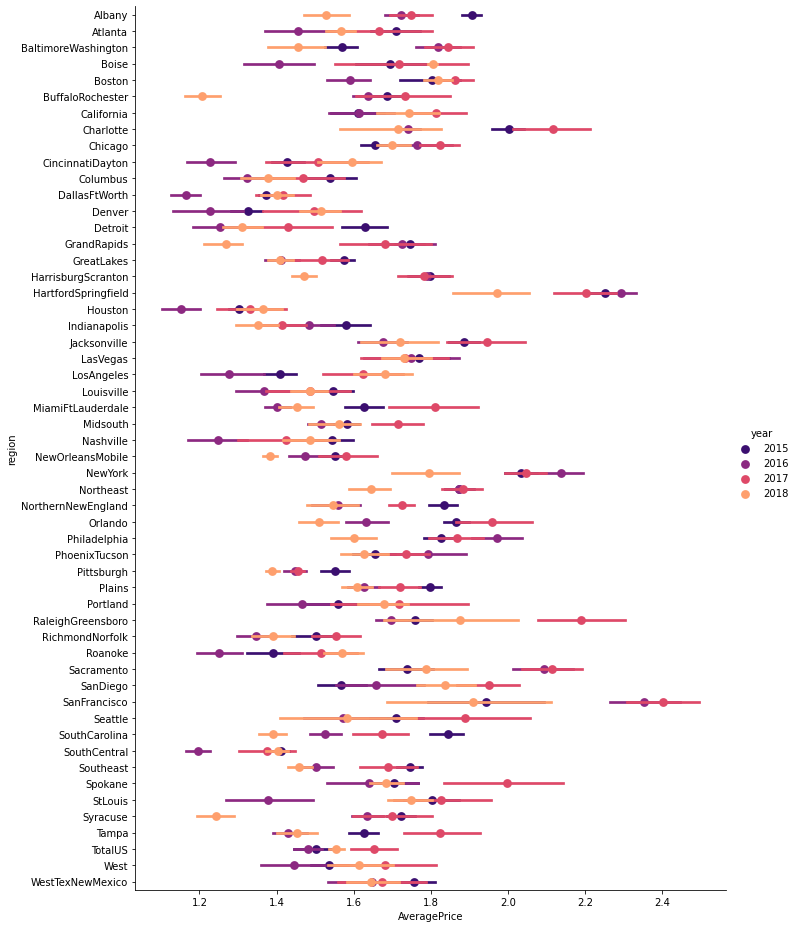

In [64]:
g = sns.factorplot('AveragePrice','region',data=data_org,
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

San Francisco In 2017 organic avocados were very expensive 

When data is segmented by type We found that the lowest prices organic are in Houston and the expensivest city is San Francisco

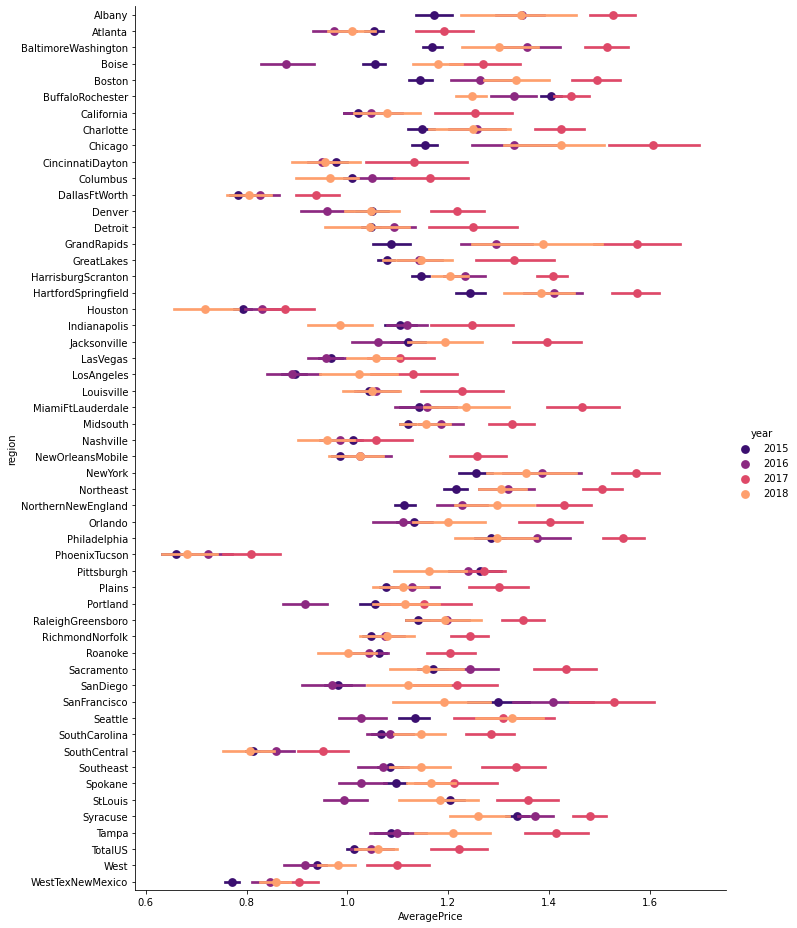

In [65]:
g = sns.factorplot('AveragePrice','region',data=data_con,
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

Organic avocado type is more expensive. And avocado is generally more expensive with each passing year.

When data is segmented by type We found that the lowest prices conventional are in Phoenix and the expensivest city is chicago



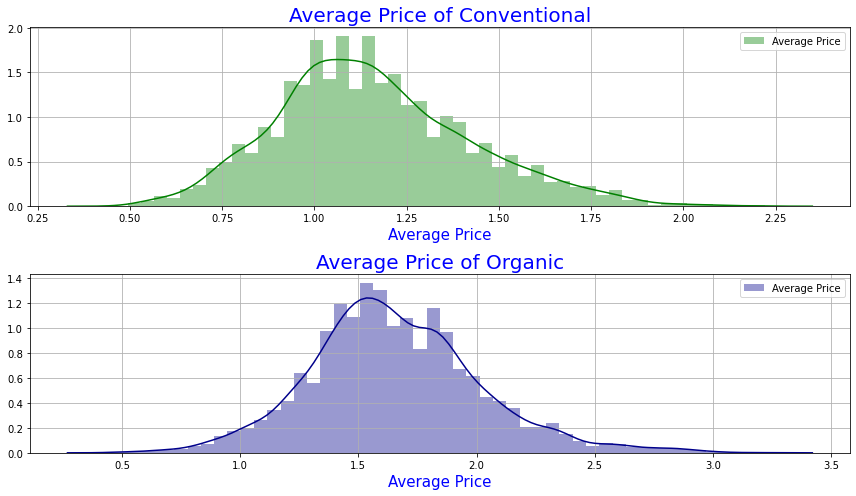

In [66]:
f,ax = plt.subplots(figsize = (12,7))
plt.subplot(2,1,1) # ikiye birlik düzlemde ilk grafik
sns.distplot(data_con.AveragePrice,color="green",label="Average Price");
plt.title("Average Price of Conventional",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.legend()
plt.grid()
#
plt.subplot(2,1,2)
sns.distplot(data_org.AveragePrice,color="darkblue",label="Average Price");
plt.title("Average Price of Organic",fontsize = 20,color='blue')
plt.xlabel('Average Price',fontsize = 15,color='blue')
plt.tight_layout() # grafikler daha düzgün gözükecek
plt.legend()
plt.grid()

Average price is normally distributed both organic and conventional

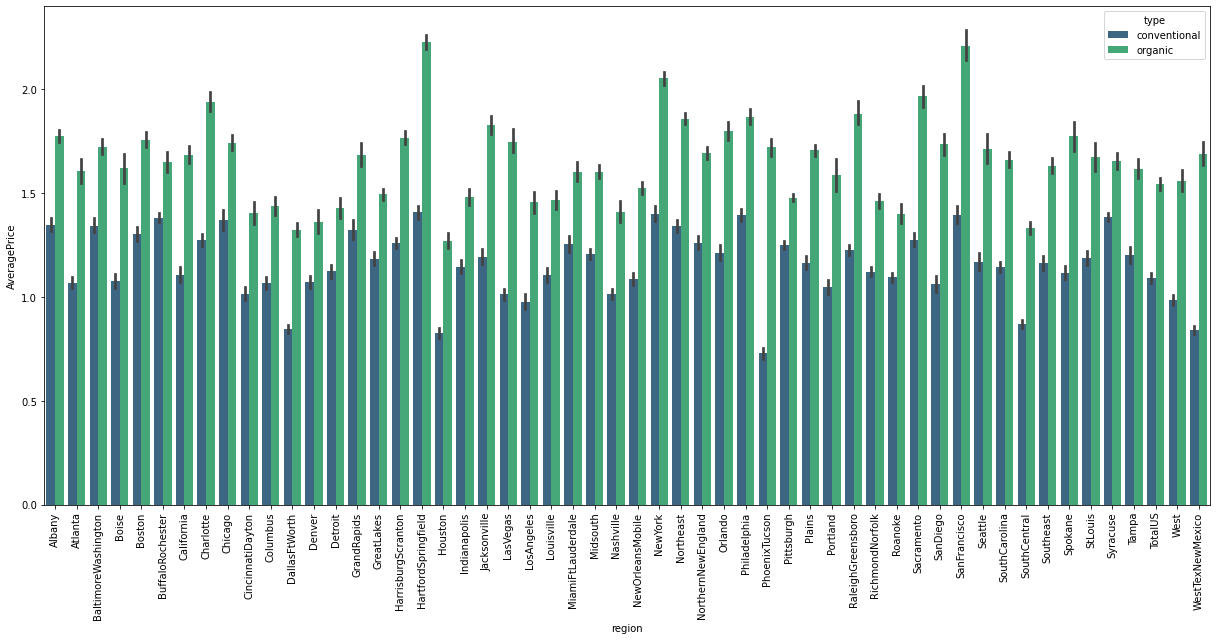

In [67]:
# Avocado Average Price
f,ax = plt.subplots(figsize = (17,9))
sns.barplot(x="region", y="AveragePrice",hue="type",data=data,palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()

Regarding the prices relative to the regions, we find that San Francisco is the most expensive city to sell avocados in general, Houston is the cheapest area to sell

In [68]:
data['type']= data['type'].map({'conventional':0,'organic':1})

# Extracting month from date column.
data.Date = data.Date.apply(pd.to_datetime)
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

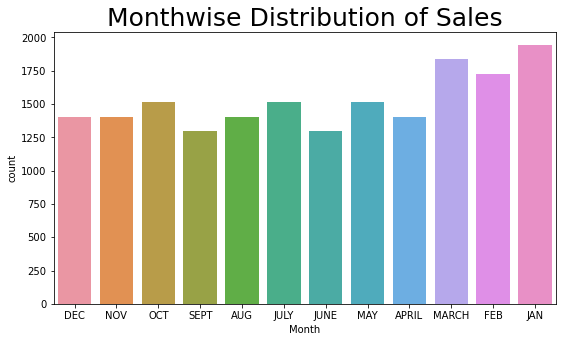

In [69]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25});

It implies that sales of avacado see a rise in January, Febuary and March.

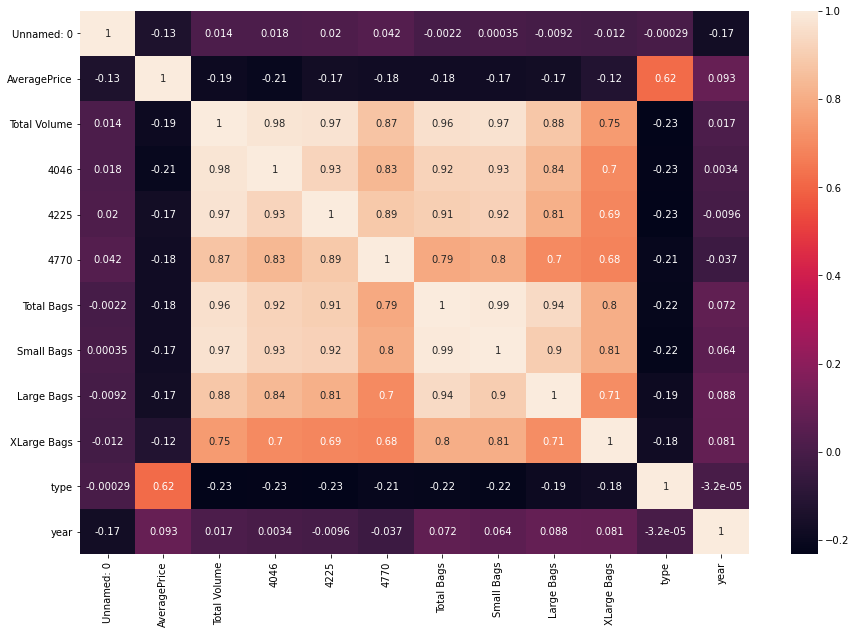

In [70]:
plt.figure(figsize=(15,10))
p=sns.heatmap(data.corr(), annot=True) 

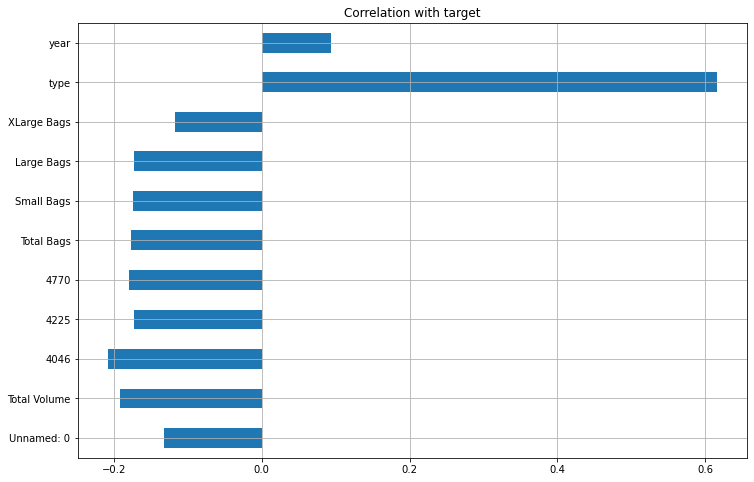

In [71]:
data.drop('AveragePrice', axis=1).corrwith(data.AveragePrice).plot(kind='barh', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

1: In correlation matrix and graph we see that year and type are positivile correleated with target variable.

2: And all the remainig variables are negative correlated  with target variable.

In [72]:
data.skew(axis=0)

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
dtype: float64

In [73]:
# Treating the skewness in the dataset
for index in data.skew().index:
    if data.skew().loc[index]>0.55:
        data[index]=np.log1p(data[index])

In [74]:
data = data.drop(['Unnamed: 0'],axis = 1)
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)
target = data['AveragePrice']

# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Standardizing the data
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

In [75]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
#to save time all models can be applied once using for loop
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1),
    'XGBoost' : XGBRegressor()
}
results=pd.DataFrame(columns=['MAE','MSE','R2-score'])
for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

In [77]:
results

,MAE,MSE,R2-score
Linear Regression,0.061,0.006,0.767
Decision Tree,0.053,0.006,0.769
Random Forest,0.039,0.003,0.891
Support Vector Machines,0.068,0.007,0.741
K-nearest Neighbors,0.044,0.004,0.839
XGBoost,0.038,0.003,0.901


In [78]:
results.sort_values('R2-score',ascending=False)

,MAE,MSE,R2-score
XGBoost,0.038,0.003,0.901
Random Forest,0.039,0.003,0.891
K-nearest Neighbors,0.044,0.004,0.839
Decision Tree,0.053,0.006,0.769
Linear Regression,0.061,0.006,0.767
Support Vector Machines,0.068,0.007,0.741


Clerarly we get 90% r2 score in XGBRegressor also less MAE and MSE compare with others model so we use this Xgboost model

In [80]:
from sklearn.model_selection import GridSearchCV
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [5, 10, 15,20,25],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [81]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 14.3min finished


{'colsample_bytree': 0.7,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 25,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [82]:
Xgb = XGBRegressor(colsample_bytree = 0.7,
  learning_rate = 0.1,
  max_depth = 10,
  min_child_weight = 1,
  n_estimators = 25,
  objective = 'reg:squarederror',
  subsample = 0.7)

In [83]:
Xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [84]:
y_pred = Xgb.predict(X_test)

In [85]:
np.round(r2_score(y_test,y_pred),3)

0.806

In [86]:
import joblib
joblib.dump(Xgb, 'Avocado_pkl')

['Avocado_pkl']